In [1]:
import numpy as np
import numpy.random as npr
import math
import matplotlib.pyplot as plt
from timeit import timeit

1\. **Reductions**

Find the total mean, and the mean for each row and column of the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [3]:
m = np.arange(12).reshape((3,4))

for i in range(m.shape[0]):
    print("The mean of row", i, "is: ", np.mean(m[i,:]))

print()    
for i in range(m.shape[1]):
    print("The mean of column", i, "is: ", np.mean(m[:,i]))

print("The total mean of the matrix is:", np.mean(m))

The mean of row 0 is:  1.5
The mean of row 1 is:  5.5
The mean of row 2 is:  9.5

The mean of column 0 is:  4.0
The mean of column 1 is:  5.0
The mean of column 2 is:  6.0
The mean of column 3 is:  7.0
The total mean of the matrix is: 5.5


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

2\. **Outer product**

Find the outer product of the following vectors:

```python
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
```

Use different methods to do this:

   1. Using the function `outer` in numpy
   2. Using a nested `for` loop or a list comprehension
   3. Using numpy broadcasting operations

In [4]:
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])

print("The outer product using the function outer is: \n", np.outer(u,v))
print()

l1 = []
for i in range(len(u)):
    for j in range(len(v)):
        l1.append(u[i]*v[j])

outer_prod1 = np.array(l1).reshape(len(v), len(u))        
print("The outer product using the for loop is: \n", outer_prod1)
print()

l2 = [u[i]*v[j] for i in range(len(u)) for j in range(len(v))]

outer_prod2 = np.array(l2).reshape(len(v), len(u))        
print("The outer product using the list comprehension is: \n", outer_prod2, "\n")

u_vert = u.reshape(len(u), 1)
outer_prod3 = u_vert * v
print("The outer product using broadcasting operations: \n", outer_prod3)

The outer product using the function outer is: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

The outer product using the for loop is: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

The outer product using the list comprehension is: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

The outer product using broadcasting operations: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. **Matrix masking**

Create a 10 by 6 matrix of float random numbers, distributed between 0 and 3 according to a flat distribution.

After creating the matrix, set all entries $< 0.3$ to zero using a mask.

In [5]:
npr.seed(456)

uniform_matrix = 3 * npr.rand(10, 6)

print("The matrix with uniform numbers between 0 and 3 is: \n ", uniform_matrix, "\n")

mask = (uniform_matrix < 0.3)

print("The mask is: \n", mask, "\n")

uniform_matrix[mask] = 0

print("The modified matrix is: \n", uniform_matrix, "\n")

The matrix with uniform numbers between 0 and 3 is: 
  [[0.74626773 0.48920035 2.35092977 2.42557017 1.87688528 1.8123409 ]
 [2.65710571 2.2773524  0.54331517 0.45050795 1.30703811 1.15581766]
 [1.72712961 0.43827208 2.05977906 1.40641202 1.70999744 1.93710304]
 [2.17002193 2.04201228 0.54275142 0.35447545 0.72820319 0.02455025]
 [1.08020549 0.43812524 1.62816917 2.57131031 0.60063649 0.40390038]
 [0.64078068 2.91946696 2.57498936 1.60135597 1.30337577 0.5615777 ]
 [0.86482794 1.88150199 1.06711761 2.18836624 1.6709647  2.82716986]
 [0.4606369  2.68867678 0.53410401 1.78278755 0.12788888 1.96017164]
 [1.10015865 2.38670932 0.03272114 1.44083112 0.29043039 0.38421883]
 [2.45767262 1.81015735 2.89762862 2.07960233 2.92637428 1.55189021]] 

The mask is: 
 [[False False False False False False]
 [False False False False False False]
 [False False False False False False]
 [False False False False False  True]
 [False False False False False False]
 [False False False False False False]
 [F

4\. **Trigonometric functions**

Use `np.linspace` to create an array of 100 numbers between $0$ and $2\pi$ (inclusive).

  * Extract every 10th element using the slice notation
  * Reverse the array using the slice notation
  * Extract elements where the absolute difference between the `sin` and `cos` functions evaluated for that element is $< 0.1$
  * **Optional**: make a plot showing the sin and cos functions and indicate where they are close

The reversed array is: 
 [3.14159265 3.10985939 3.07812614 3.04639288 3.01465962 2.98292636
 2.9511931  2.91945984 2.88772658 2.85599332 2.82426006 2.7925268
 2.76079354 2.72906028 2.69732703 2.66559377 2.63386051 2.60212725
 2.57039399 2.53866073 2.50692747 2.47519421 2.44346095 2.41172769
 2.37999443 2.34826118 2.31652792 2.28479466 2.2530614  2.22132814
 2.18959488 2.15786162 2.12612836 2.0943951  2.06266184 2.03092858
 1.99919533 1.96746207 1.93572881 1.90399555 1.87226229 1.84052903
 1.80879577 1.77706251 1.74532925 1.71359599 1.68186273 1.65012947
 1.61839622 1.58666296 1.5549297  1.52319644 1.49146318 1.45972992
 1.42799666 1.3962634  1.36453014 1.33279688 1.30106362 1.26933037
 1.23759711 1.20586385 1.17413059 1.14239733 1.11066407 1.07893081
 1.04719755 1.01546429 0.98373103 0.95199777 0.92026451 0.88853126
 0.856798   0.82506474 0.79333148 0.76159822 0.72986496 0.6981317
 0.66639844 0.63466518 0.60293192 0.57119866 0.53946541 0.50773215
 0.47599889 0.44426563 0.41253237 0.380

Text(0, 0.5, 'f(y)')

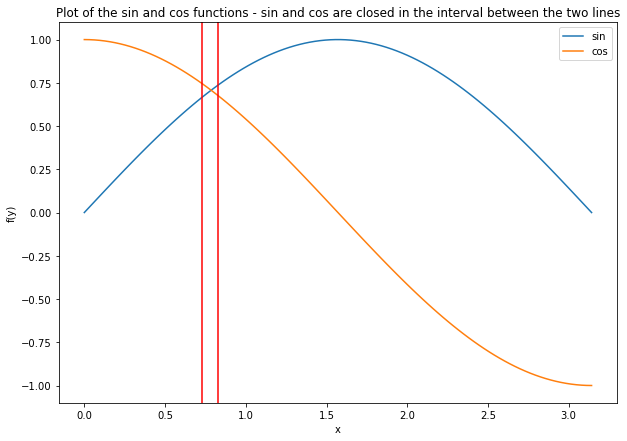

In [13]:
a = np.linspace(0, math.pi, 100)

reverse_a = a[::-1]

print("The reversed array is: \n", reverse_a, "\n")

mask = ( abs(np.sin(reverse_a) - np.cos(reverse_a)) < 0.1 )
filtered_a = reverse_a[mask]

print("The filtered array is: \n", filtered_a, "\n")

print('The range of interest is in between the two vertical lines:')

fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(reverse_a, np.sin(reverse_a), label='sin')
ax.plot(reverse_a, np.cos(reverse_a), label='cos')
ax.legend(loc='upper right')
ax.axvline(filtered_a[0], color='red')
ax.axvline(filtered_a[-1], color='red')
ax.set_title('Plot of the sin and cos functions - sin and cos are closed in the interval between the two lines')
ax.set_xlabel('x')
ax.set_ylabel('f(y)')

5\. **Matrices**

Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal matrix (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagonal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [14]:
x = np.arange(1, 11)
y = np.arange(1, 11)

table = y.reshape(len(y), 1) * x

trace = np.sum(np.diag(table))

anti_diag = np.diag(np.fliplr(table))

diag_sup = np.diag(table, k=1)

print("The 10 by 10 moltiplication table is: \n ", table, "\n")

print("The trace of the table is: ", trace, "\n")

print("The anti diagonal is: \n", anti_diag, "\n")
print("The upper diagonal is: \n", diag_sup, "\n")

The 10 by 10 moltiplication table is: 
  [[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]] 

The trace of the table is:  385 

The anti diagonal is: 
 [10 18 24 28 30 30 28 24 18 10] 

The upper diagonal is: 
 [ 2  6 12 20 30 42 56 72 90] 



6\. **Broadcasting**

Use broadcasting to create a grid of distances.

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles.

The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Build a 2D grid of distances among each city along Route 66
  * Convert the distances in km

In [15]:
distances= np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

grid_miles = abs( distances - distances.reshape(len(distances), 1) )

grid_km = 1.609 * grid_miles

print("The distances in miles are: \n", grid_miles, "\n")

print("The distances in km are: \n", grid_km, "\n")

The distances in miles are: 
 [[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]] 

The distances in km are: 
 [[   0.     318.582  487.527 1184.224 1401.439 1890.575 2373.275 2484.296
  3078.017 3938.832]
 [ 318.582    0.     168.945  865.642 1082.857 1571.993 2054.693 2165.714
  2759.435 3620.25 ]
 [ 487.527  168.945    0.     696.697  913.912 1403.048 1885.748 1996.769
  2590.49  3451.305]
 [1184.224  865.642  696.697    0.     217.215  706.351 1189.051 1300.072
  1893.793 2754.608]
 [1401.439 1082.857  913.912  

7\. **Prime numbers sieve**

Compute the prime numbers in the 0-N (start with N=99) range with a sieve (mask).

  * Constract a shape (N,) boolean array, which is the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (with `timeit`); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [17]:
def prime_numbers(n):

    numbers = np.arange(2, n)
    l_mask = []

    for i in range(len(numbers)):
        j = 2
        check = False
        while j < 10 and check == False:
            if numbers[i] % j == 0 and numbers[i] != j:
                l_mask.append(0)
                check = True
            j = j+1    
        if check == False:
            l_mask.append(1) 
        
    a_mask = np.array(l_mask, dtype=bool)
    prime_n = numbers[a_mask]
    
    return a_mask, prime_n


def Eratosthenes(m):
    n = 50
    primes_n = np.arange(2, n+1)
    mask_p = [True for i in range(2, n+1)]
    p = 2
    while (p * p <= n):
        if (mask_p[p-2] == True):
            for i in range(p * p, n+1, p):
                mask_p[i-2] = False
        p += 1
    return primes_n[mask_p]

N = 100

mask, primes = prime_numbers(N)

time_n = []
time_erat = []

tn = 5
for i in range(tn):
    n = N*10**(i)
    time_n.append(timeit(stmt="prime_numbers(n)", setup='', number=1, globals=globals()))
    time_erat.append(timeit(stmt="Eratosthenes(n)", setup='', number=1, globals=globals()))
    
rate_sum_n = 0
rate_sum_erat = 0

for i in range(1, tn):
    rate_sum_n = rate_sum_n + time_n[i]/time_n[i-1]
    rate_sum_erat = rate_sum_erat + time_erat[i]/time_erat[i-1]

print("The prime numbers between 0 and",  N-1,  " obtained with the mask method are: \n ", primes, "\n")

print("The time employed to calculate them is: ", time_n[0], "seconds. \n")

print("When N increases by a factor 10 the time increases by a factor: ", "%.2f" % (rate_sum_n/(tn-1)), "\n")

print("The prime numbers between 0 and",  N-1,  " obtained with the Eratosthenes sieve are: \n ", primes, "\n")

print("Using the sieve of Eratosthenes the time is reduced of 5 orders of magnitute \n")

print('Array with the times obtained with the first method, for increasing N: \n', time_n, '\n')
print('Array with the times obtained with the method of Eratosthenes, for increasing N: \n', time_erat)

The prime numbers between 0 and 99  obtained with the mask method are: 
  [ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97] 

The time employed to calculate them is:  0.0004155999999966298 seconds. 

When N increases by a factor 10 the time increases by a factor:  10.96 

The prime numbers between 0 and 99  obtained with the Eratosthenes sieve are: 
  [ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97] 

Using the sieve of Eratosthenes the time is reduced of 5 orders of magnitute 

Array with the times obtained with the first method: 
 [0.0004155999999966298, 0.0038022999999611784, 0.04914950000011231, 0.5783959000000323, 5.7932872999999745] 

Array with the times obtained with the method of Eratosthenes: 
 [5.03999999637017e-05, 5.55999999960477e-05, 0.00010640000004968897, 5.8500000022831955e-05, 6.710000002385641e-05]


8\. **Diffusion using random walk**

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of many random walkers after a given amount of time.

*Hint*: create a 2D array where each row represents a walker, and each column represents a time step.

  * Take 1000 walkers and let them walk for 200 steps
  * Use `randint` to create a 2D array of size $walkers \times steps$ with values -1 or 1
  * Calculate the walking distances for each walker (e.g. by summing the elements in each row)
  * Take the square of the previously-obtained array (element-wise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * **Optional**: plot the average distances ($\sqrt(distance^2)$) as a function of time (step)

The mean of the squared distances at each step is: 
 [1.0, 1.976, 2.968, 4.02, 4.8, 5.672, 6.488, 7.364, 8.408, 9.192, 10.312, 11.28, 12.152, 13.316, 14.24, 14.82, 15.416, 16.548, 17.944, 19.244, 20.032, 21.208, 22.192, 22.924, 23.968, 25.124, 26.192, 26.904, 28.0, 29.036, 30.136, 31.26, 32.552, 34.256, 35.544, 36.768, 37.952, 38.74, 39.016, 39.744, 41.08, 42.38, 43.136, 44.724, 45.768, 46.664, 47.56, 48.584, 49.464, 49.7, 51.12, 51.9, 52.832, 53.22, 54.64, 56.096, 57.608, 59.34, 60.712, 62.228, 64.128, 64.936, 64.936, 65.584, 65.848, 66.812, 67.528, 68.288, 69.624, 71.224, 72.328, 73.74, 74.8, 75.572, 76.776, 78.732, 79.496, 80.464, 80.768, 82.008, 83.288, 83.884, 84.544, 85.996, 86.576, 87.376, 89.32, 90.496, 91.28, 92.08, 92.272, 92.7, 93.24, 93.82, 94.776, 95.396, 96.872, 98.668, 97.6, 99.552, 101.336, 103.048, 103.984, 104.22, 105.752, 107.028, 108.328, 109.432, 110.776, 111.204, 112.728, 112.844, 113.24, 113.112, 113.904, 114.628, 116.184, 116.812, 117.376, 117.676, 119.52, 121.6

Text(0, 0.5, 'Avarage distance')

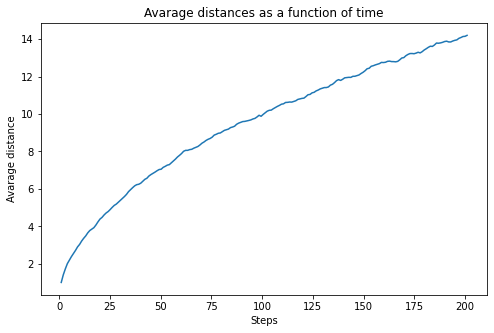

In [21]:
npr.seed(123)

walkers = 1000
steps = 200

random_walk = npr.randint(-1, 1, size=(walkers, steps))
random_walk[random_walk == 0] = 1

distance = []
for i in range(random_walk.shape[0]):
    distance.append(np.sum(random_walk[i,:]))
    
walkers_distance = np.array(distance) # array with the walking distances for each walker

squared_distances = walkers_distance**2

row = []
for i in range(walkers):
    partial_sum = 0
    for j in range(steps):
        partial_sum = partial_sum + random_walk[i,j]
        row.append(partial_sum**2)

squared_distance_single_step = np.array(row).reshape((walkers,steps))

media = []
for j in range(squared_distance_single_step.shape[1]):
    media.append(np.mean(squared_distance_single_step[:,j]))
    
print("The mean of the squared distances at each step is: \n", media, "\n")

mean_distance = np.sqrt(np.array(media))

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(np.linspace(1, steps+1, steps), mean_distance)
ax.set_title('Avarage distances as a function of time')
ax.set_xlabel('Steps')
ax.set_ylabel('Avarage distance')